In [1]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline


c:\users\lenovo\anaconda3\envs\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\lenovo\anaconda3\envs\python37\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\lenovo\anaconda3\envs\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [3]:

IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64


SEQUENCE_LENGTH = 20


DATASET_DIR = "dataset"


CLASSES_LIST = ["cleanAndJerk", "Biking", "HighJump", "PushUps"]

In [4]:
def frames_extraction(video_path):
    
    listofframe = []
    
    vid = cv2.VideoCapture(video_path)

    count_frame = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(count_frame/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):

        vid.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = vid.read() 

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        normalized_frame = resized_frame / 255
        
        listofframe.append(normalized_frame)
    
    vid.release()

    return listofframe

In [7]:
def create_dataset():
    
    listOfFeatures = []
    allLabels = []
    videoPaths = []
    
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        print("Extracting Data for Class",class_name)
        
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
    
        for file_name in files_list:
            
            filePath = os.path.join(DATASET_DIR, class_name, file_name)
            print(filePath)
            frames = frames_extraction(filePath)

#             print(len(frames))
            if len(frames) == SEQUENCE_LENGTH:
#                 print("Hello")
                listOfFeatures.append(frames)
                allLabels.append(class_index)
                videoPaths.append(filePath)


    listOfFeatures = np.asarray(listOfFeatures)
    allLabels = np.array(allLabels)  
    
    # Return the frames, class index, and video file path.
    return listOfFeatures, allLabels, videoPaths

In [8]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data for Class cleanAndJerk
dataset\cleanAndJerk\v_CleanAndJerk_g01_c01.avi
dataset\cleanAndJerk\v_CleanAndJerk_g01_c02.avi
dataset\cleanAndJerk\v_CleanAndJerk_g01_c03.avi
dataset\cleanAndJerk\v_CleanAndJerk_g01_c04.avi
dataset\cleanAndJerk\v_CleanAndJerk_g01_c05.avi
dataset\cleanAndJerk\v_CleanAndJerk_g02_c01.avi
dataset\cleanAndJerk\v_CleanAndJerk_g02_c02.avi
dataset\cleanAndJerk\v_CleanAndJerk_g02_c03.avi
dataset\cleanAndJerk\v_CleanAndJerk_g02_c04.avi
dataset\cleanAndJerk\v_CleanAndJerk_g03_c01.avi
dataset\cleanAndJerk\v_CleanAndJerk_g03_c02.avi
dataset\cleanAndJerk\v_CleanAndJerk_g03_c03.avi
dataset\cleanAndJerk\v_CleanAndJerk_g03_c04.avi
dataset\cleanAndJerk\v_CleanAndJerk_g03_c05.avi
dataset\cleanAndJerk\v_CleanAndJerk_g03_c06.avi
dataset\cleanAndJerk\v_CleanAndJerk_g04_c01.avi
dataset\cleanAndJerk\v_CleanAndJerk_g04_c02.avi
dataset\cleanAndJerk\v_CleanAndJerk_g04_c03.avi
dataset\cleanAndJerk\v_CleanAndJerk_g04_c04.avi
dataset\cleanAndJerk\v_CleanAndJerk_g04_c05.avi
d

dataset\Biking\v_Biking_g15_c01.avi
dataset\Biking\v_Biking_g15_c02.avi
dataset\Biking\v_Biking_g15_c03.avi
dataset\Biking\v_Biking_g15_c04.avi
dataset\Biking\v_Biking_g15_c05.avi
dataset\Biking\v_Biking_g16_c01.avi
dataset\Biking\v_Biking_g16_c02.avi
dataset\Biking\v_Biking_g16_c03.avi
dataset\Biking\v_Biking_g16_c04.avi
dataset\Biking\v_Biking_g16_c05.avi
dataset\Biking\v_Biking_g17_c01.avi
dataset\Biking\v_Biking_g17_c02.avi
dataset\Biking\v_Biking_g17_c03.avi
dataset\Biking\v_Biking_g17_c04.avi
dataset\Biking\v_Biking_g17_c05.avi
dataset\Biking\v_Biking_g17_c06.avi
dataset\Biking\v_Biking_g18_c01.avi
dataset\Biking\v_Biking_g18_c02.avi
dataset\Biking\v_Biking_g18_c03.avi
dataset\Biking\v_Biking_g18_c04.avi
dataset\Biking\v_Biking_g18_c05.avi
dataset\Biking\v_Biking_g18_c06.avi
dataset\Biking\v_Biking_g19_c01.avi
dataset\Biking\v_Biking_g19_c02.avi
dataset\Biking\v_Biking_g19_c03.avi
dataset\Biking\v_Biking_g19_c04.avi
dataset\Biking\v_Biking_g20_c01.avi
dataset\Biking\v_Biking_g20_

dataset\PushUps\v_PushUps_g05_c03.avi
dataset\PushUps\v_PushUps_g05_c04.avi
dataset\PushUps\v_PushUps_g06_c01.avi
dataset\PushUps\v_PushUps_g06_c02.avi
dataset\PushUps\v_PushUps_g06_c03.avi
dataset\PushUps\v_PushUps_g06_c04.avi
dataset\PushUps\v_PushUps_g07_c01.avi
dataset\PushUps\v_PushUps_g07_c02.avi
dataset\PushUps\v_PushUps_g07_c03.avi
dataset\PushUps\v_PushUps_g07_c04.avi
dataset\PushUps\v_PushUps_g08_c01.avi
dataset\PushUps\v_PushUps_g08_c02.avi
dataset\PushUps\v_PushUps_g08_c03.avi
dataset\PushUps\v_PushUps_g08_c04.avi
dataset\PushUps\v_PushUps_g09_c01.avi
dataset\PushUps\v_PushUps_g09_c02.avi
dataset\PushUps\v_PushUps_g09_c03.avi
dataset\PushUps\v_PushUps_g09_c04.avi
dataset\PushUps\v_PushUps_g10_c01.avi
dataset\PushUps\v_PushUps_g10_c02.avi
dataset\PushUps\v_PushUps_g10_c03.avi
dataset\PushUps\v_PushUps_g10_c04.avi
dataset\PushUps\v_PushUps_g11_c01.avi
dataset\PushUps\v_PushUps_g11_c02.avi
dataset\PushUps\v_PushUps_g11_c03.avi
dataset\PushUps\v_PushUps_g11_c04.avi
dataset\Push

In [9]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [10]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [11]:
one_hot_encoded_labels = to_categorical(labels)

In [12]:
one_hot_encoded_labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [13]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [15]:
    
ourmodel = Sequential()
ourmodel.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (20,
                                                                                      64, 64, 3)))
    

In [16]:
ourmodel.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
ourmodel.add(TimeDistributed(Dropout(0.3)))
    
ourmodel.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.3, return_sequences=True))
    
ourmodel.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
ourmodel.add(TimeDistributed(Dropout(0.3)))
    
ourmodel.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
ourmodel.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
ourmodel.add(TimeDistributed(Dropout(0.2)))

In [17]:
ourmodel.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
ourmodel.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    
ourmodel.add(Flatten()) 
    
ourmodel.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    
ourmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 20, 62, 62, 4)     1024      
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 20, 31, 31, 4)     0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 20, 31, 31, 4)     0         
_________________________________________________________________
conv_lst_m2d_5 (ConvLSTM2D)  (None, 20, 29, 29, 8)     3488      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 20, 15, 15, 8)     0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 20, 15, 15, 8)     0         
_________________________________________________________________
conv_lst_m2d_6 (ConvLSTM2D)  (None, 20, 13, 13, 14)   

In [18]:

ourmodel.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])


In [19]:
convlstm_model_training_history = ourmodel.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4,
                                                     shuffle = True, validation_split = 0.2)

Epoch 1/10
73/73 [==============================] - 96s 1s/step - loss: 1.3783 - accuracy: 0.2836 - val_loss: 1.3866 - val_accuracy: 0.3151
Epoch 2/10
73/73 [==============================] - 82s 1s/step - loss: 1.2677 - accuracy: 0.3536 - val_loss: 0.9748 - val_accuracy: 0.6575
Epoch 3/10
73/73 [==============================] - 80s 1s/step - loss: 0.9101 - accuracy: 0.6320 - val_loss: 0.7374 - val_accuracy: 0.7123
Epoch 4/10
73/73 [==============================] - 79s 1s/step - loss: 0.6949 - accuracy: 0.7276 - val_loss: 0.6561 - val_accuracy: 0.7260
Epoch 5/10
73/73 [==============================] - 79s 1s/step - loss: 0.5345 - accuracy: 0.8294 - val_loss: 0.6579 - val_accuracy: 0.7123
Epoch 6/10
73/73 [==============================] - 78s 1s/step - loss: 0.4279 - accuracy: 0.8338 - val_loss: 0.6342 - val_accuracy: 0.7671
Epoch 7/10
73/73 [==============================] - 78s 1s/step - loss: 0.2954 - accuracy: 0.9201 - val_loss: 0.4587 - val_accuracy: 0.8082
Epoch 8/10
73/73 [==

In [20]:
# Evaluate the trained model.
model_evaluation_history = ourmodel.evaluate(features_test, labels_test)

4/4 [==============================] - 5s 1s/step - loss: 0.5000 - accuracy: 0.7705


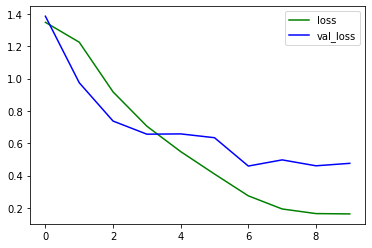

In [23]:
    
loss_plot = convlstm_model_training_history.history['loss']
val_loss_plot = convlstm_model_training_history.history['val_loss']

plt.plot(range(len(loss_plot)), loss_plot, 'green', label = 'loss')
plt.plot(range(len(val_loss_plot)), val_loss_plot, 'blue', label = 'val_loss',)

plt.legend()

In [24]:

test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
video_title = "output"

input_video_file_path = "C://Users//LENOVO//projects//AI project//dataset//HighJump//v_HighJump_g01_c05.avi"

In [25]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    
    vid = cv2.VideoCapture(video_file_path)

    videowidth = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    videoheight = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   vid.get(cv2.CAP_PROP_FPS), (videowidth, videoheight))

    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    predicted_class_name = ''

    while vid.isOpened():

        ok, frame = vid.read() 
        
        if not ok:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        normalized_frame = resized_frame / 255

        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:

            predicted_labels_probabilities = ourmodel.predict(np.expand_dims(frames_queue, axis = 0))[0]

            predicted_label = np.argmax(predicted_labels_probabilities)

            predicted_class_name = CLASSES_LIST[predicted_label]

        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        video_writer.write(frame)
        
    vid.release()
    vid.release()

In [26]:
output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'

predict_on_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)

VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
